In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
from math import tan, radians

In [20]:
from google.colab.patches import cv2_imshow

In [25]:
def ICV_plot_two_images(img1: np.array, img1_title, img2: np.array, img2_title):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img1, cmap='gray')
    ax[0].set_xlabel(img1_title)

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_xlabel(img2_title)

## Q1

### Part a)

In [ ]:
def ICV_image_shear(image_in, angle): 
  """ Function to shear an image the given angle"""

  height, width, dim = image_in.shape # specify the height, width and number of channels of the image

  angle_radians = radians(angle) # convert the angle from degree to radians

  # adjusting width of the output image
  width1 = abs(tan(angle_radians)) 

  width2      = int((height-1)*width1)     

  # output image dimensions
  image_out = np.zeros((height, width+width2, dim), dtype='uint8')

  
  w1, w2 = (0, -width1)  # clockwise image rotation

  for y in range(height):  # performing horizontal shearing to loop over height of the image
      shiftX = w1-int(y*w2) # shifting the pixels by w2
      image_out[y][shiftX:shiftX+width] = image_in[y] # saving output in a new image
    
  return image_out


In [ ]:
def ICV_rotate_image(image, angle):
    '''
    function to rotate the image by the given angle
    '''
    # converting the angle to radians
    rads = math.radians(angle)

    # setting new image size
    image_out = np.uint8(np.zeros(image.shape))

    # Finding the center point of rotated (or original) image.
    height = image_out.shape[0]
    width  = image_out.shape[1]

    # Finding the middle 
    midx, midy = (width//2, height//2)

    # x = x cos 0 + y sin 0
    # y = x sin 0 + y cos 0
    for row in range(image_out.shape[0]):
        for col in range(image_out.shape[1]):
            new_x = (row-midx)*math.cos(rads)+(col-midy)*math.sin(rads)
            new_y = -(row-midx)*math.sin(rads)+(col-midy)*math.cos(rads)

            new_x = round(new_x)+midx 
            new_y = round(new_y)+midy 

            if (new_x>=0 and new_y>=0 and new_x<image.shape[0] and  new_y<image.shape[1]): 
                image_out[row, col, :] = image[new_x, new_y, :] # saving the new pixel values

    return image_out 

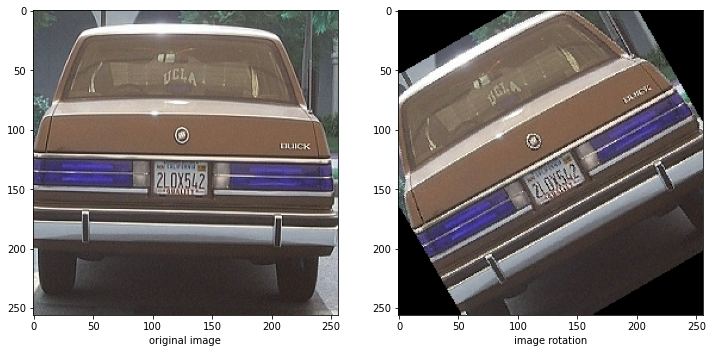

In [ ]:
image_in = cv.imread("car-1.jpg")
angle = 30
image_out = ICV_rotate_image(image_in, angle)

ICV_plot_two_images(image_in, "original image", image_out, "image rotation") 

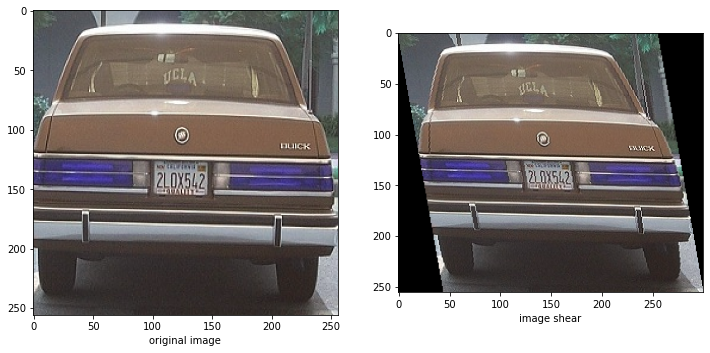

In [ ]:
angle = 10
image_in = cv.imread("car-1.jpg") # read an input image
image_in = np.asarray(image_in) # convert into a numpy array

image_out = ICV_image_shear(image_in, angle) 
ICV_plot_two_images(image_in, "original image", image_out, "image shear") 

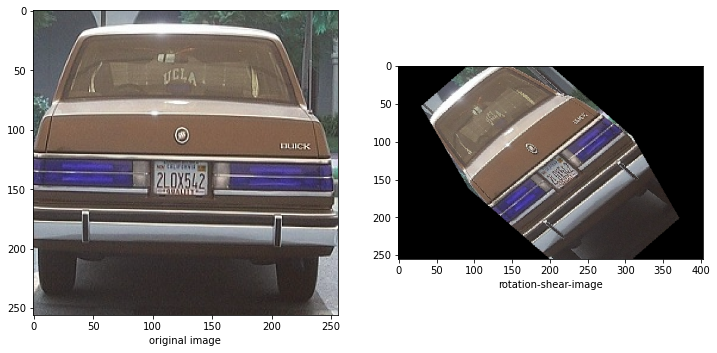

In [ ]:
image_out_rotation = ICV_rotate_image(image_in, angle)

image_out_shear = ICV_image_shear(image_out_rotation, angle) 


ICV_plot_two_images(image_in, "original image", image_out_shear, "rotation-shear-image") 

### Part b)

In [ ]:

#https://python.plainenglish.io/generating-text-on-image-with-python-eefe4430fe77

from PIL import Image, ImageDraw, ImageFont

width = 250
height = 200
message = "ANUM"
img = Image.new('RGB', (width, height), color='green')

draw = ImageDraw.Draw(img)

# specified font size
font = ImageFont.truetype('arial.ttf', 72,) 
w, h = draw.textsize(message)

draw.text((w,h), message, fill="black", font=font)

img.save('result.jpg')

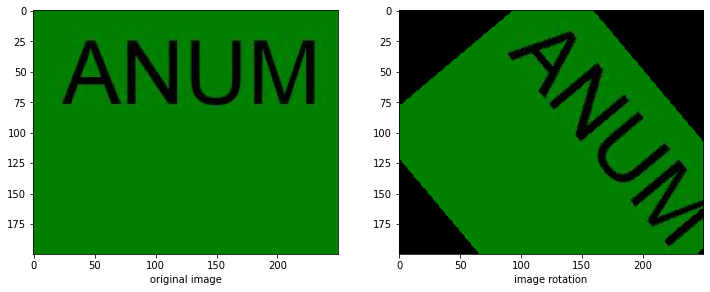

In [ ]:
angle = -50
image_in = cv.imread("result.jpg")
image_out = ICV_rotate_image(image_in, angle)

ICV_plot_two_images(image_in, "original image", image_out, "image rotation") 

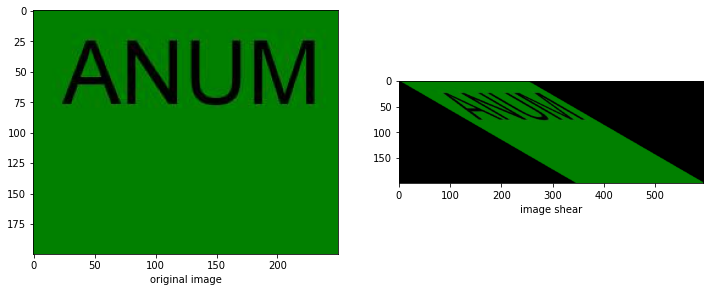

In [ ]:
angle = 60
image_in = cv.imread("result.jpg") # read an input image
image_in = np.asarray(image_in) # convert into a numpy array

image_out = ICV_image_shear(image_in, angle) 
ICV_plot_two_images(image_in, "original image", image_out, "image shear") 

### Part c)

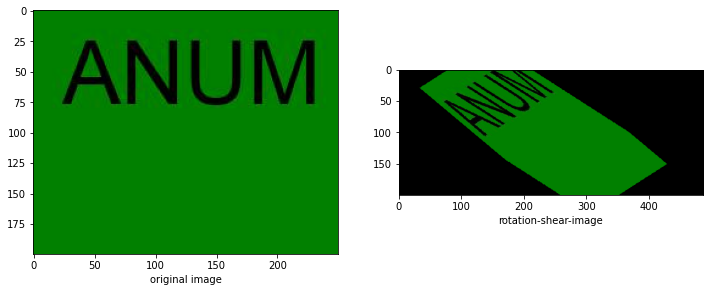

In [ ]:
angle = 20
image_out_rotation = ICV_rotate_image(image_in, angle)

angle = 50
image_out_shear = ICV_image_shear(image_out_rotation, angle) 


ICV_plot_two_images(image_in, "original image", image_out_shear, "rotation-shear-image") 

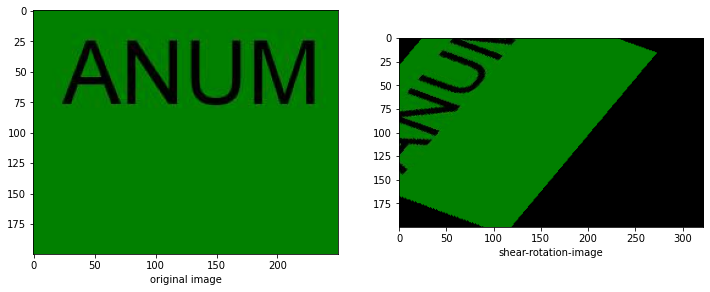

In [ ]:

angle = 20
image_out_shear = ICV_image_shear(image_in, angle) 

angle = 50
image_out_rotation = ICV_rotate_image(image_out_shear, angle)

ICV_plot_two_images(image_in, "original image", image_out_rotation, "shear-rotation-image") 

## Q2.

In [ ]:
def ICV_convolve(img, kernel):

    num_pixels = 0
    for i in range(img.shape[0]): # looping through the image size
        added = i + kernel.shape[0] 
        if added <= img.shape[0]: 
            num_pixels += 1
    
    target_size = num_pixels

    k = kernel.shape[0]
 
    
    # 2D array- resultant of zeros
    convolved_img = np.zeros(shape=(target_size, target_size))
    
    # Iterate over the rows
    
    for i in range(target_size):
          # Iterate over the columns
          for j in range(target_size):
              # Get the range of values within the matrix which needs to be multiplied with the kernel
              mat = img[i:i+k, j:j+k]
              
              # Apply the convolution - element-wise multiplication and summation of the result
              
              convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

### Part a) 

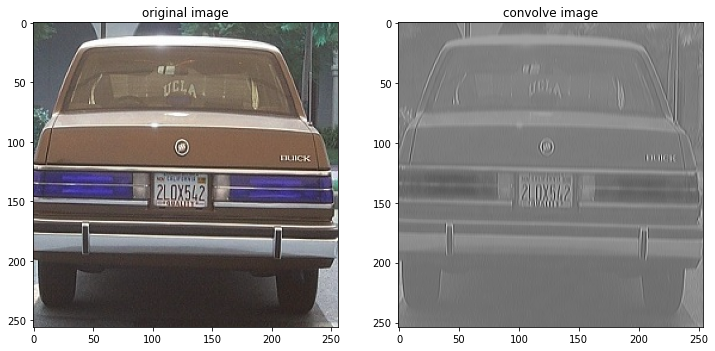

In [ ]:
image = cv.imread("car-1.jpg")

## sharpening kernel 
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

convolve_image = ICV_convolve(image, kernel)

ICV_plot_two_images(image, "original image", convolve_image, "convolve image") 

### Part b)


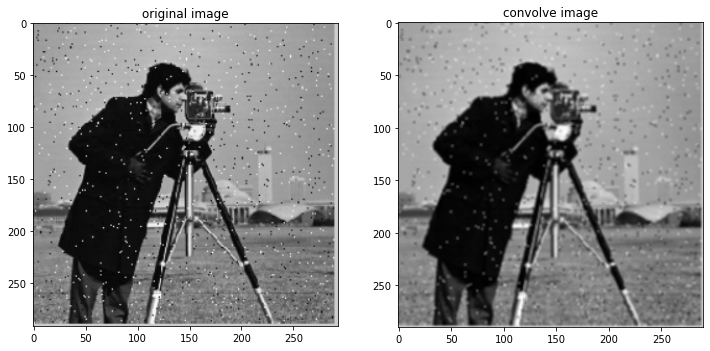

In [ ]:
image = cv.imread("noisy-image.png")
kernel=np.ones((3,3,3))*1/9

convolve_image = ICV_convolve(image, kernel)

ICV_plot_two_images(image, "original image", convolve_image, "convolve image") 

### Part c)

In [ ]:
kernel_A = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

kernel_B = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

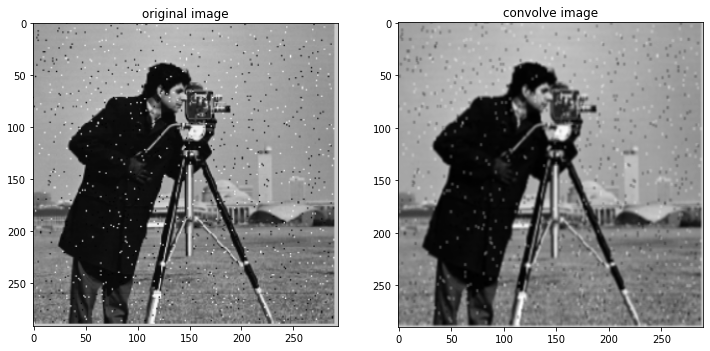

In [ ]:
convolve_image = ICV_convolve(image, kernel_A)

ICV_plot_two_images(image, "original image", convolve_image, "convolve image") 

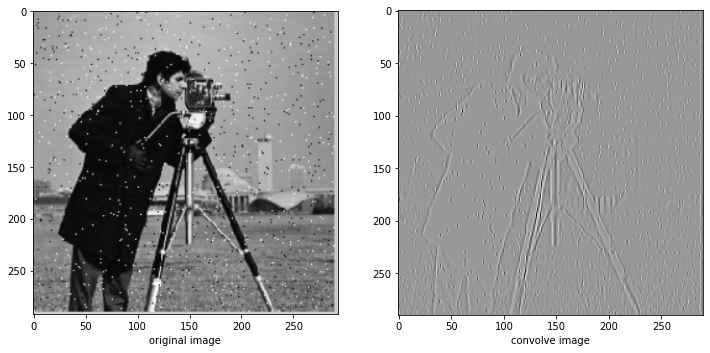

In [ ]:
convolve_image = ICV_convolve(image, kernel_B)

ICV_plot_two_images(image, "original image", convolve_image, "convolve image") 

### Part d)

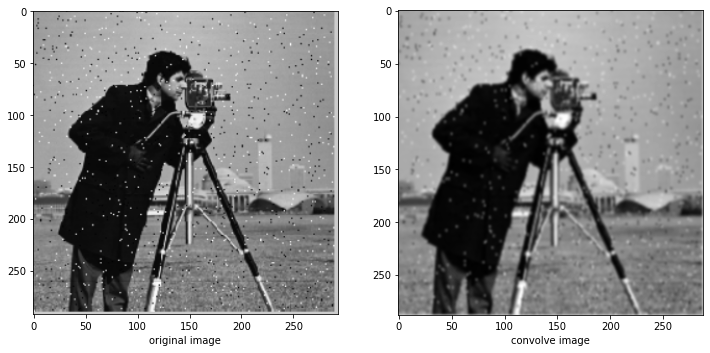

In [ ]:
convolve_image_A = ICV_convolve(image, kernel_A)
convolve_image_A_A = ICV_convolve(convolve_image_A, kernel_A)


ICV_plot_two_images(image, "original image", convolve_image_A_A, "convolve image") 

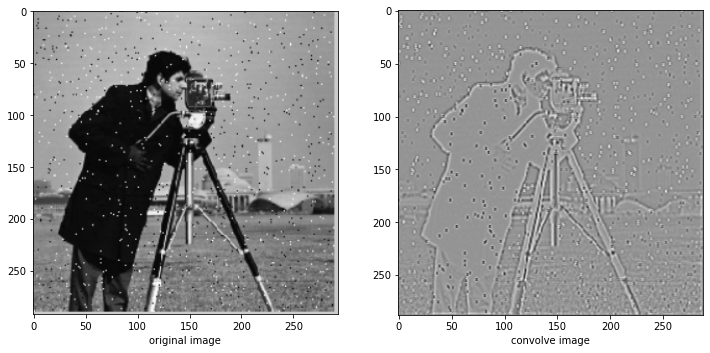

In [ ]:
convolve_image_A = ICV_convolve(image, kernel_A)
convolve_image_A_B = ICV_convolve(convolve_image_A, kernel_B)


ICV_plot_two_images(image, "original image", convolve_image_A_B, "convolve image") 

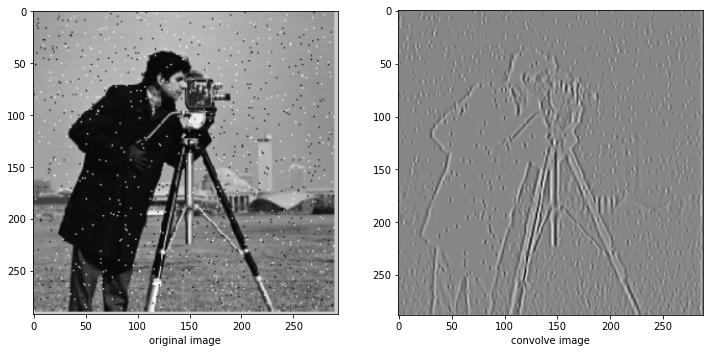

In [ ]:
convolve_image_B = ICV_convolve(image, kernel_B)
convolve_image_B_A = ICV_convolve(convolve_image_B, kernel_A)


ICV_plot_two_images(image, "original image", convolve_image_B_A, "convolve image") 

## Q3.

In [169]:
## Part a)
def ICV_colored_histogram_plot(image, hist):


  _, ax = plt.subplots(1, 2, figsize=(12, 5))
  
  if(len(image.shape)<3):
      #print("grey scale")
      row, col = image.shape # read image dimensions
      grey = image
      channels = [grey]
  else:
    #print("colored")
    row, col, dim = image.shape # read image dimensions

  x = np.arange(0, int(image.max())+1)
  
  ax[0].imshow(image, cmap='gray')
  
  colors = ['red', 'green', 'blue']
  for i in range(len(hist)):
    ax[1].bar(x, hist[i], color=colors[i])


  plt.title('Histogram')
  plt.xlabel('Intensity Value')
  plt.ylabel('Count')
  plt.legend(colors[:i+1])

  return None


def ICV_histogram(image):
  """"Generating histogram of an image"""
  
  if(len(image.shape)<3): # grey scaled image
      #print("grey scale")
      row, col = image.shape # read image dimensions
      grey = image
      channels = [grey]
  else:
    #print("colored")
    row, col, dim = image.shape # read image dimensions
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    channels = [red, green, blue]


  hist = []


  for count, value in enumerate(channels):
    y = np.zeros(int(image.max())+1)  # find the maximum value of y

    for i in range(0,row): # iterate over the rows 
        for j in range(0,col): # iterate over the column 
            y[value[i,j]] += 1 # assigning each level to the number of times it appeared in the image
    
    hist.append(y)

  #ICV_colored_histogram_plot(image, hist)

  return hist



### Part a)

In [ ]:
vidcap = cv.VideoCapture('DatasetB.avi') # reading dataset B

success, image = vidcap.read() # returns a single video frame

count 0 True
count 1 True
count 2 True
count 3 True
count 4 True
count 5 True
count 6 True
count 7 True
count 8 True
count 9 True


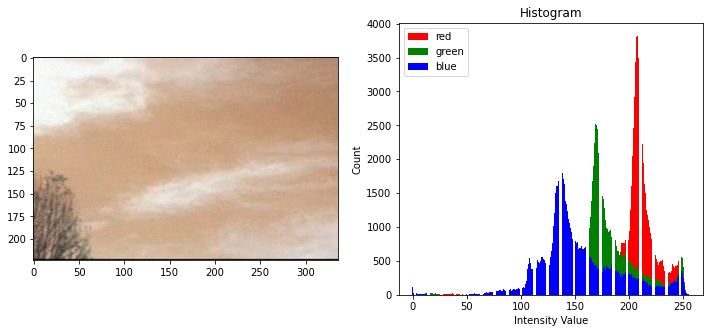

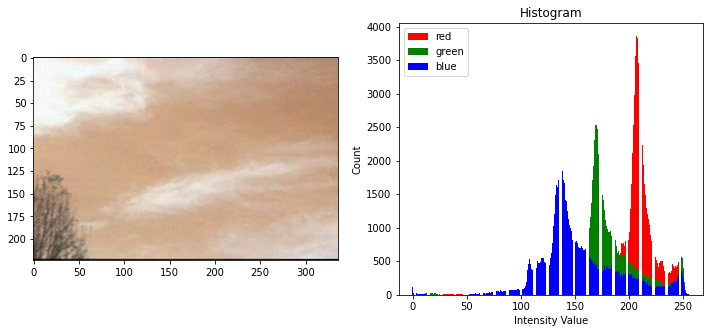

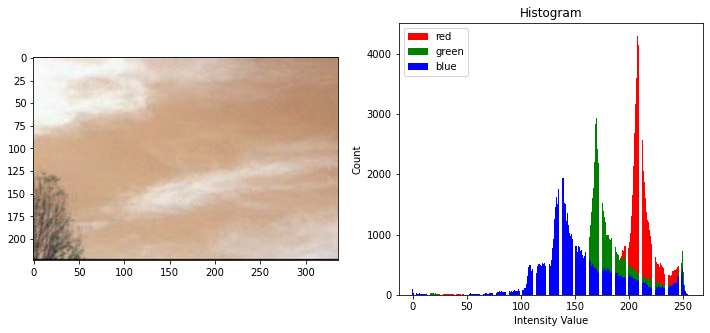

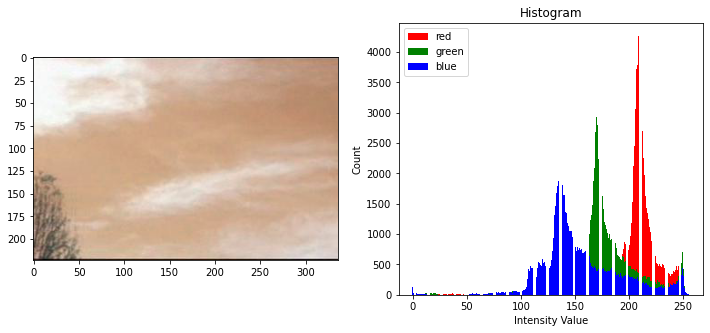

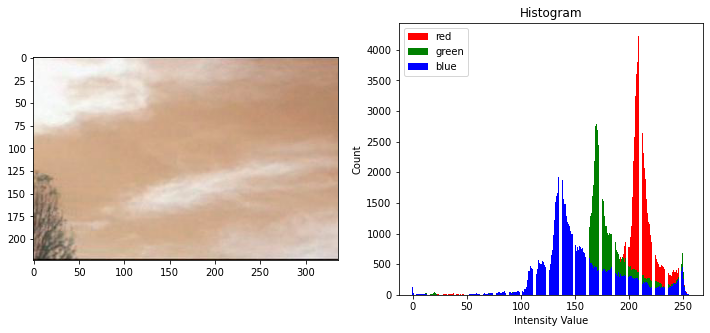

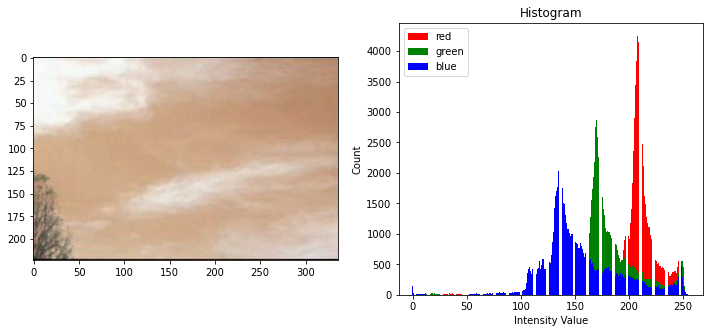

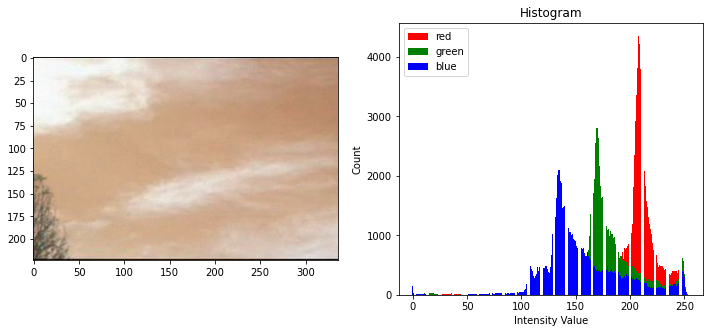

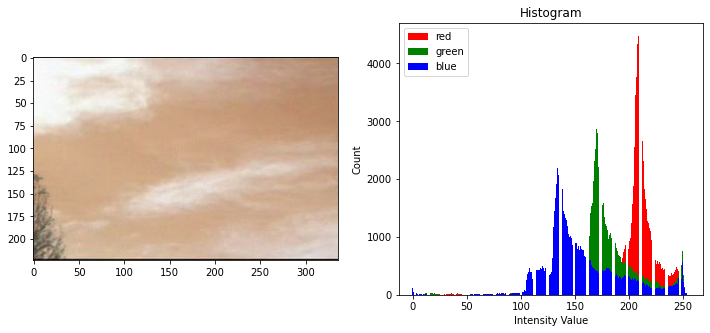

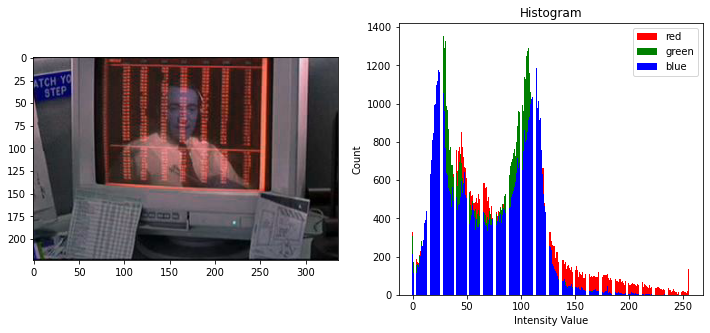

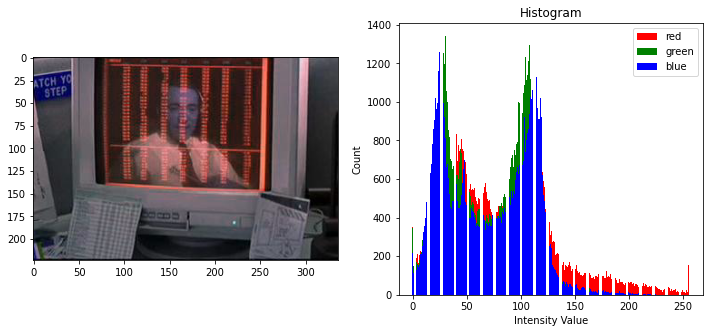

In [ ]:
count = 0
while success:   
  success, image = vidcap.read()
  ICV_histogram(image)
  print("count", count, success)
  count += 1
  
  if(count == 10):
    break

### Part b)

In [511]:
## part b)
def ICV_histogram_intersection_helper(h1, h2):
    sm = 0
    
    for i in range((h1.shape[0])-1): 
        sm += min(h1[i], h2[i]) #Σnj min[h(Ij),h(Mj)]
    return sm

def ICV_histogram_intersection(image1, image2):

  y1 = ICV_histogram(image1)
  y2 = ICV_histogram(image2)     
  s = 0
  
  # create histogram for all three color ranges and calculate intersection and average
  for i in range(3):
    s += ICV_histogram_intersection_helper(y1[i], y2[i])
  avg = s/3
  
  return avg

In [ ]:
vidcap = cv.VideoCapture('DatasetB.avi')
success, prev_image = vidcap.read() 

count = 0
y = []
while success:   
  #print("count", count)

  success, current_image = vidcap.read()
  if(success):
    intersect = ICV_histogram_intersection(prev_image, current_image)
    y.append(intersect)
  prev_image= current_image
  #if(count == 10):
    #break
  count += 1
  

Text(0, 0.5, 'Intersection of histogram')

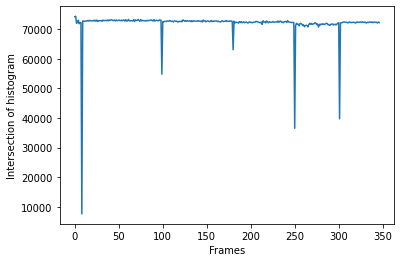

In [ ]:
x =  list( range ( 0 , len(y) , 1 )) 
plt.plot(x, y)
plt.xlabel("Frames")
plt.ylabel("Intersection of histogram")

Text(0, 0.5, 'Intersection of histogram')

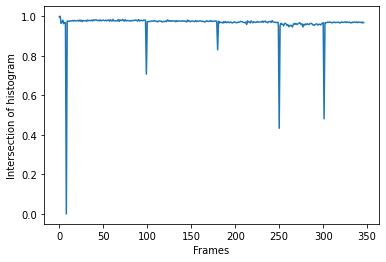

In [ ]:
# normalization
norm_y = (y - min(y)) / (max(y) - min(y))
plt.plot(x, norm_y)
plt.xlabel("Frames")
plt.ylabel("Intersection of histogram")

## Q4.

In [309]:
def ICV_binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate((binary)))

In [310]:
def ICV_histogram_plot(image, LBP_image, hist):


  _, ax = plt.subplots(1, 3, figsize=(12, 5))
  
  if(len(image.shape)<3):
      #print("grey scale")
      row, col = image.shape # read image dimensions
      grey = image
      channels = [grey]
  else:
    #print("colored")
    row, col, dim = image.shape # read image dimensions

  x = np.arange(0, int(image.max())+1)
  
  ax[0].imshow(image, cmap='gray')
  ax[1].imshow(LBP_image, cmap='gray')
  
  for i in range(len(hist)):
    ax[2].bar(x, hist[i])


  plt.title('Histogram')
  plt.xlabel('Intensity Value')
  plt.ylabel('Count')

  return None

In [414]:
def ICV_LBPimage(image_window):

    LBP_image = np.zeros_like(image_window)
    neighboor = 3 

    for row in range(0,  image_window.shape[0] - neighboor):
        for col in range(0,  image_window.shape[1] - neighboor):
            
            img          = image_window[row:row+neighboor,col:col+neighboor] # select an image kernel
          
            center       = img[1,1] # get the center of the image
            new_img        = (img >= center)*1.0 # if the values are greater than center, assign 1 to new_image and 0 otherwise
            new_img_vector = new_img.T.flatten() # flatten the image
            new_img_vector = np.delete(new_img_vector, 4) # delete the value at the 4th index which is the center
            new_img_vector_list = new_img_vector.tolist() # create a list
            num = ICV_binatodeci(new_img_vector_list) # convert to binary
          
            LBP_image[row+1,col+1] = int(num) # save the value

    
    return LBP_image 

### Part a)

In [472]:
def ICV_LBP_image_descriptor(img, window_size):
  k = 256
  img = cv.resize(img, (k, k)) # resize image

  # convert image to gray scale
  img = np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140]).astype(int) 

  # iterating to make windows
  windows = np.array([img[i:i+window_size, j:j+ window_size] for j in range(0, k, window_size) for i in range(0, k, window_size)])

  
  count = 0
  local_descriptor = []
  #_, ax = plt.subplots(1, 3, figsize=(12, 5))

  
  # make histogram
  for i in range(len(windows)):
      original = windows[i]
      windows[i] = ICV_LBPimage(windows[i])
      hist = ICV_histogram(windows[i])
      total = np.sum(hist)

      # Divide each value in the histogram by the total to normalize the histogram
      normalized_histogram = hist / total
   
      local_descriptor.append(normalized_histogram[0].ravel())
      
      count += 1

  # join blocks to form the LBP image again
  window = int(img.shape[1]/window_size)
  LBP_new_image = np.vstack (windows[0:0+window])
  for i in range(window, len(windows), window):
    temp = np.vstack (windows[i:i+window])
    LBP_new_image = np.hstack((LBP_new_image, temp))
      
  return (LBP_new_image, local_descriptor)



In [547]:
img = cv.imread("car-1.jpg") 
window_size = 128
LBP_new_image_car, global_descriptor_car = ICV_LBP_image_descriptor(img, window_size)


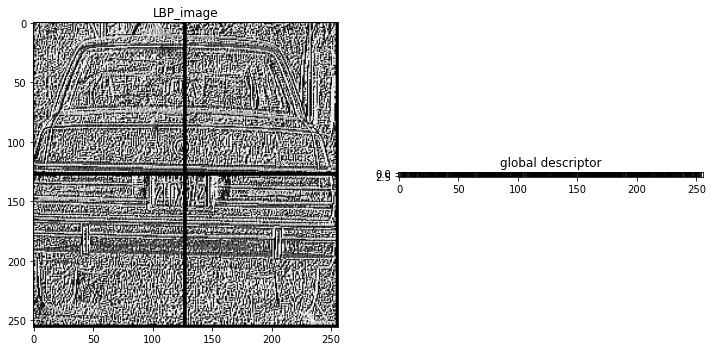

In [548]:
ICV_plot_two_images(LBP_new_image_car, "LBP_image", global_descriptor_car, "global descriptor")

In [551]:
img = cv.imread("face-1.jpg") 
window_size = 128
LBP_new_image_face, global_descriptor_face = ICV_LBP_image_descriptor(img, window_size)

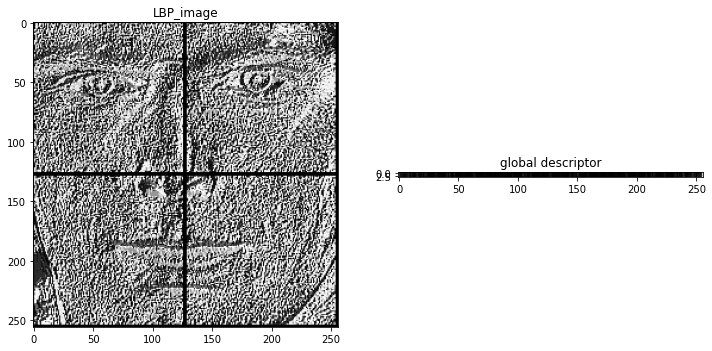

In [552]:
ICV_plot_two_images(LBP_new_image_face, "LBP_image", global_descriptor_face, "global descriptor")


### Part b)

In [553]:
def ICV_classify_image(image, face_descriptor, non_face_descriptor):
  # Calculate the global LBP feature descriptor for the image
  LBP_image, global_descriptor = ICV_LBP_image_descriptor(image, window_size)
  
  face_similarity = 0
  non_face_similarity = 0
  
  # Calculate the histogram intersection between the global descriptor and the known face and non-face descriptors
  for i in range(len(global_descriptor)):
      face_similarity += ICV_histogram_intersection_helper(global_descriptor[i], face_descriptor[i])
      non_face_similarity += ICV_histogram_intersection_helper(global_descriptor[i], non_face_descriptor[i])

  if face_similarity > non_face_similarity:
    return 'face'
  else:
    return 'non-face'


In [554]:
image = cv.imread("car-2.jpg") 
print("Actual: car-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))

image = cv.imread("car-3.jpg") 
print("Actual: car-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-2.jpg") 
print("Actual: face-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-3.jpg") 
print("Actual: face-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


Actual: car-2 Predicted: non-face
Actual: car-3 Predicted: non-face
Actual: face-2 Predicted: face
Actual: face-3 Predicted: face


### Part c)


In [ ]:
window_size = 32

In [555]:
image = cv.imread("car-2.jpg") 
print("Actual: car-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))

image = cv.imread("car-3.jpg") 
print("Actual: car-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-2.jpg") 
print("Actual: face-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-3.jpg") 
print("Actual: face-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


Actual: car-2 Predicted: non-face
Actual: car-3 Predicted: non-face
Actual: face-2 Predicted: face
Actual: face-3 Predicted: face


### Part d)

In [ ]:
window_size = 128

In [ ]:
image = cv.imread("car-2.jpg") 
print("Actual: car-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))

image = cv.imread("car-3.jpg") 
print("Actual: car-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-2.jpg") 
print("Actual: face-2", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))


image = cv.imread("face-3.jpg") 
print("Actual: face-3", "Predicted: {}".format(ICV_classify_image(image, global_descriptor_face, global_descriptor_car)))

## Q5.

### Part a)

In [10]:
def ICV_frame_differencing(frames, threshold):
  # Initialize the reference frame as the first frame in the sequence
  reference_frame = frames[0]

  # Initialize an empty list to store the results of the frame differencing
  results = []

  # Loop through each frame in the sequence
  for frame in frames:
    # Initialize an empty array to store the results for the current frame
    current_results = np.zeros(frame.shape, dtype=np.uint8)

    # Loop through each pixel in the current frame
    for i in range(frame.shape[0]):
      for j in range(frame.shape[1]):
        # Calculate the difference between the current pixel and the corresponding pixel in the reference frame
        diff = abs(frame[i, j] - reference_frame[i, j])

        # Apply the classification threshold to the difference
        if diff > threshold:
          # Classify the pixel as "changed" if the difference is greater than the threshold
          current_results[i, j] = 255
        else:
          # Classify the pixel as "unchanged" if the difference is less than or equal to the threshold
          current_results[i, j] = 0
    # Add the results for the current frame to the results list
    results.append(current_results)


  return results


### Part b)

In [11]:
def ICV_frame_differencing_2(frames, threshold):
  # Initialize a list to store the difference frames
  diff_frames = []

  # Iterate over the frames in the sequence
  for i in range(1, len(frames)):
    # Initialize the difference frame as an array of zeros with the same shape as the input frames
    diff_frame = np.zeros(frames[i].shape)

    # Iterate over the pixels in the frame
    for j in range(frames[i].shape[0]):
      for k in range(frames[i].shape[1]):
        # Calculate the difference between the current pixel and the corresponding pixel in the previous frame
        diff = frames[i][j, k] - frames[i-1][j, k]

        # If the difference is above the threshold, set the corresponding pixel in the difference frame to 255
        if diff > threshold:
          diff_frame[j, k] = 255

    # Add the difference frame to the list of difference frames
    diff_frames.append(diff_frame)

  return diff_frames


### Part c)

In [12]:
def ICV_generate_reference_frame(frames):
  # Initialize the reference frame as the first frame in the sequence
  reference_frame = frames[0].astype(int)

  # Calculate the difference between each frame and the previous frame
  differences = []
  for i in range(1, len(frames)):
    differences.append((frames[i] - frames[i-1]).astype(int))

  # Apply a weighted average to the differences, with more recent differences being given a higher weight
  for i, diff in enumerate(differences):
    reference_frame = (reference_frame + diff * (i+1)) / len(differences)

  return reference_frame


### Part d)

In [13]:
def ICV_count_moving_objects(frames):
  # Initialize a list to store the counts for each frame
  counts = []

  # Iterate over the frames in the sequence
  for frame in frames:
    # Initialize a counter for the number of moving objects in the frame
    count = 0

    # Iterate over the pixels in the frame
    for i in range(frame.shape[0]):
      for j in range(frame.shape[1]):
        # If the pixel has a non-zero intensity, increment the count
        if frame[i, j] != 0:
          count += 1

    # Add the count for the current frame to the list of counts
    counts.append(count)

  # Generate a bar plot visualizing the counts
  plt.bar(range(len(counts)), counts)
  plt.show()


In [14]:
vidcap = cv.VideoCapture('DatasetC.avi') # reading dataset C
success, ref_image = vidcap.read()
ref_image  = np.dot(ref_image [:, :, :3], [0.2989, 0.5870, 0.1140]).astype(int)

In [16]:
count = 1
t = 24
frames = []
while success:   

  success, current_image = vidcap.read()
  if(success):
    current_image  = np.dot(current_image [:, :, :3], [0.2989, 0.5870, 0.1140]).astype(int)
    frames.append(current_image) # reading all image frames and saving them in an array
    #cv2_imshow(current_image)

count += 1

In [ ]:
## part a)
threshold = 24  
frame_differencing_reference_image = ICV_frame_differencing(frames, threshold)

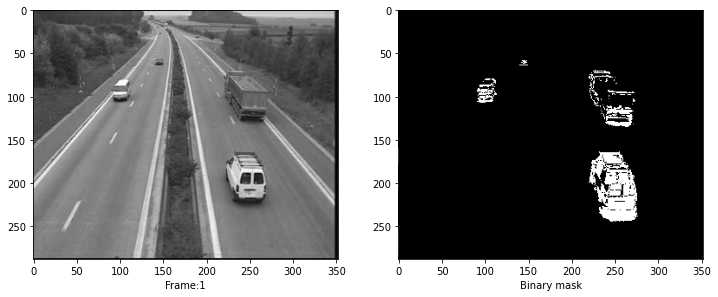

In [29]:
#cv2_imshow(frame_differencing_reference_image[1])
ICV_plot_two_images(frames[1], "Frame:{}".format(1), frame_differencing_reference_image[1], "Binary mask")

In [17]:
## part b)
threshold = 24
frame_differencing_previous_image = ICV_frame_differencing(frames, threshold)


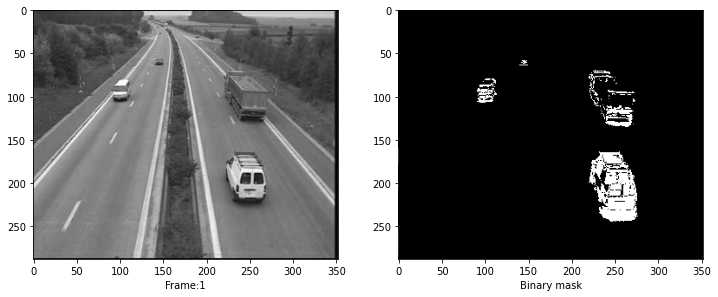

In [28]:

ICV_plot_two_images(frames[1], "Frame:{}".format(1), frame_differencing_previous_image[1], "Binary mask")

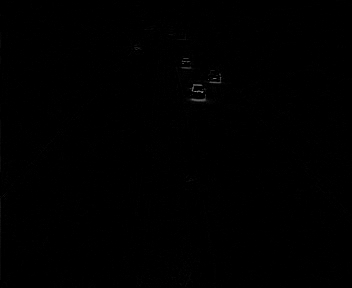

In [30]:
## part c)
ref_frame = ICV_generate_reference_frame(frames)

cv2_imshow(ref_frame)

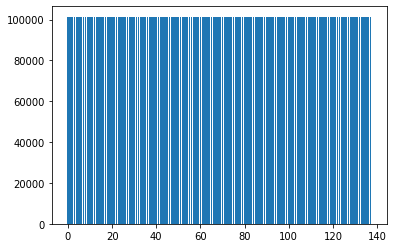

In [31]:
## part d)
ICV_count_moving_objects(frames)